In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf

import seaborn as sns
plt.rcParams["figure.figsize"] = (12,5)
import warnings
warnings.filterwarnings('ignore')


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
random_state=0
'''Constructing a pandas dataframe from a matlab .mat file'''

data_set = loadmat("LCAlgarve.mat")
mat = {k: v for k, v in data_set.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[:, 0]) for k, v in mat.items()})

data1 = data[["DayCode1", "Occupation1", "Power1"]]

data2 = data[["DayCode2", "Occupation2", "Power2"]]

data1 = data1.rename(
    columns={"DayCode1": "DayCode", "Occupation1": "Occupation", "Power1": "Power"})
data2 = data2.rename(
    columns={"DayCode2": "DayCode", "Occupation2": "Occupation", "Power2": "Power"})

data=pd.concat([data2,data1])
data = data.dropna(axis=0)

In [2]:
import scipy.stats as stats


def statsTest(data):
    stat, p = stats.normaltest(data.Power)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05

    # Make a decision on the test result
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
    print('Kurtosis of normal distribution: {}'.format(
        stats.kurtosis(data.Power)))
    print('Skewness of normal distribution: {}'.format(stats.skew(data.Power)))


def statPlots(data):
    # Calculate summary statistics by occupation
    plt.figure(figsize=(15, 7))
    stats = data.groupby('DayCode').agg({'Occupation': ['mean', 'std']})
    stats.columns = [' '.join(col).strip() for col in stats.columns.values]
    # Create a normal plot using seaborn
    sns.displot(data, x='Power', hue='Occupation', kind='kde', fill=True)

    # Plot the first subplot showing  boxplot of power
    plt.figure(figsize=(15, 7))
    # Adjust the subplot's width
    plt.subplots_adjust(wspace=0.2)
    # Create the Swarmplot using Seaborn's swarmplot function
    sns.swarmplot(x=data["DayCode"], y=data["Power"],
                  data=data, hue="Occupation", palette='deep')
    # Label the x-axis
    plt.xlabel('DayCode', fontsize=12)
    # Add a title to the plot
    plt.title('Swarm plot of Power', fontsize=14)
    # Remove the top and right spines of the plot
    sns.despine(left=True, bottom=True)
    # Add a tight layout to the plot
    plt.tight_layout()

    # Plot from Consumption for Dataset
    # Exploratory Data Analysis(EDA)
    plt.figure(figsize=(14, 6))
    plt.plot(data['Power'], color='purple')
    plt.ylabel('Power', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    plt.tick_params(bottom=False)
    plt.title('Power Consumption for Dataset', fontsize=14)
    plt.tight_layout()
    plt.grid(True)
    sns.despine(bottom=True, left=True)
    # plt.show()

    # Plotting the histogram and normal probability plot for 'Power' column
    plt.figure(figsize=(15, 7))
    # Histogram of 'Global_active_power' column
    plt.subplot(1, 2, 1)
    data["Power"].hist(bins=70, color='purple')
    plt.title('Power Distribution', fontsize=16)


statsTest(data)

Statistics=500.327, p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of normal distribution: 1.6963600512675807
Skewness of normal distribution: 1.04577179073994


<Figure size 1500x700 with 0 Axes>

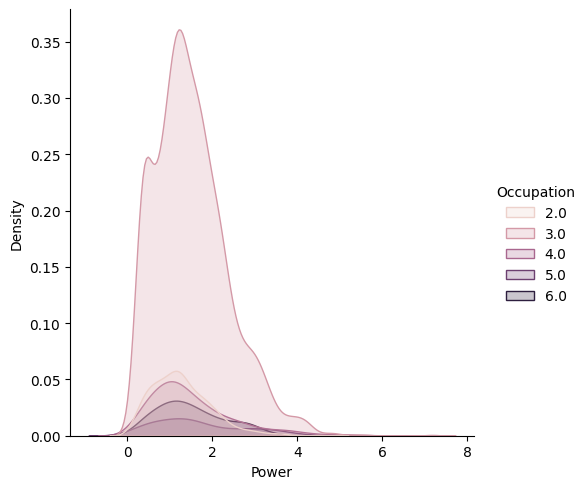

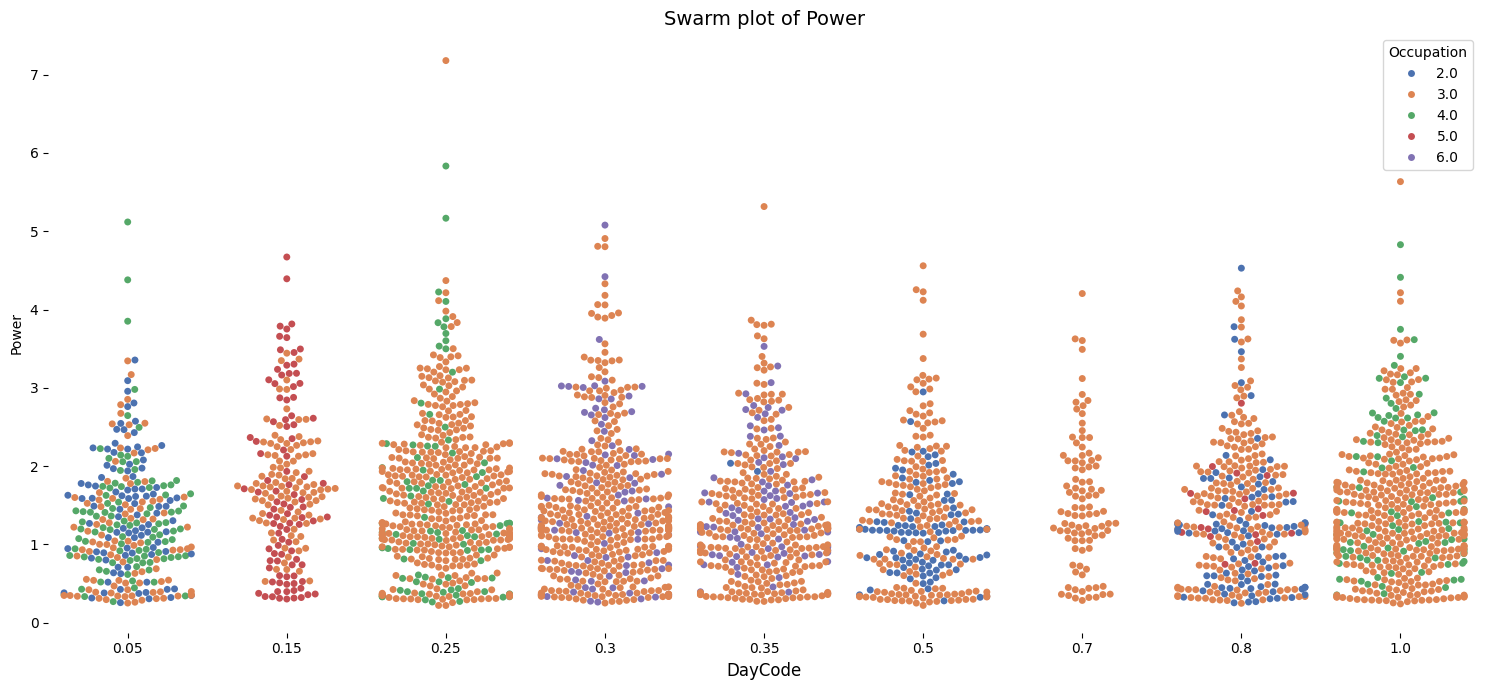

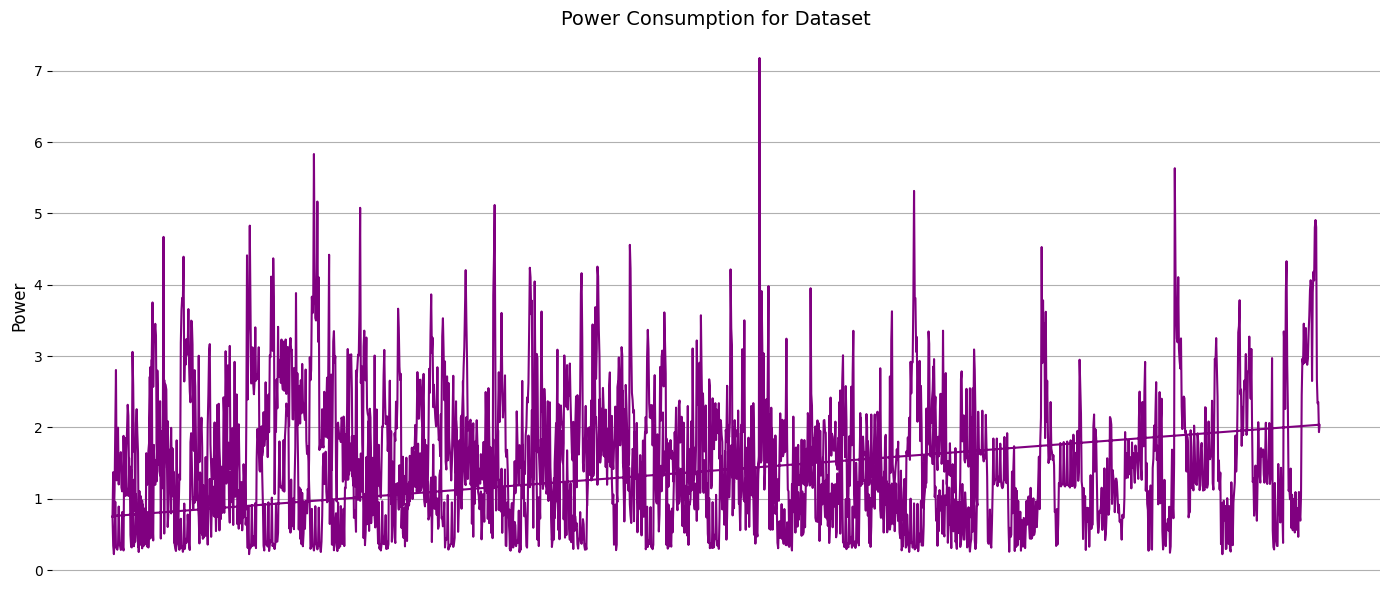

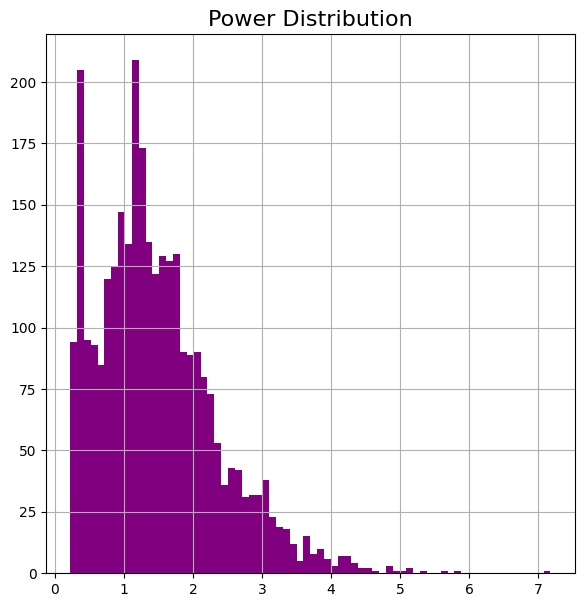

In [3]:
statPlots(data)

In [4]:
power_data = data[["Power"]]
power_data.head()

,Power
0,0.747135
1,1.370311
2,0.759630
3,1.125687
4,1.910926


In [5]:
occupation_data = data[["Occupation"]]
occupation_data.head()

,Occupation
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0


In [6]:
Daycode_data=data[["DayCode"]]
Daycode_data.head()

,DayCode
0,0.8
1,0.8
2,0.8
3,0.8
4,0.8


In [7]:
# Split the dataset into train and test set
train_size = int(power_data.shape[0] * 0.67)
train_df, test_df = power_data.iloc[:train_size,
                                    :], power_data.iloc[train_size:, :]

In [8]:
def create_dataset(dataset, look_back=1):
    m = len(dataset)
    X = []
    y = []
    for i in range(look_back, m):
        X.append(dataset[i - look_back: i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)


look_back = 48
X_train, y_train = create_dataset(train_df.values, look_back=look_back)
X_test, y_test = create_dataset(test_df.values, look_back=look_back)

In [9]:
for i in range(5):
    print(X_train[i], y_train[i])

[0.74713526 1.3703114  0.75962978 1.1256868  1.9109261  2.8036382
 1.2568336  1.4198141  1.9953911  1.1989693  1.5829287  1.4552845
 1.6520101  1.1543362  1.101666   1.1442198  1.8806111  1.4344088
 1.2170812  1.0379183  1.6548614  1.9332529  2.3160789  2.1603418
 1.3008278  1.4510714  0.49174506 0.32265278 0.31624093 1.2729064
 0.74097119 0.33293056 0.41263285 0.39810133 1.0659107  0.78917422
 0.527358   0.35886333 0.31347822 0.884484   0.59856567 0.70094451
 0.50170711 0.30380545 0.91852756 0.33570144 0.58847386 0.74022511] 0.36778479
[1.3703114  0.75962978 1.1256868  1.9109261  2.8036382  1.2568336
 1.4198141  1.9953911  1.1989693  1.5829287  1.4552845  1.6520101
 1.1543362  1.101666   1.1442198  1.8806111  1.4344088  1.2170812
 1.0379183  1.6548614  1.9332529  2.3160789  2.1603418  1.3008278
 1.4510714  0.49174506 0.32265278 0.31624093 1.2729064  0.74097119
 0.33293056 0.41263285 0.39810133 1.0659107  0.78917422 0.527358
 0.35886333 0.31347822 0.884484   0.59856567 0.70094451 0.501

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
983/983 - 4s - 4ms/step - loss: 0.6952
Epoch 2/20
983/983 - 2s - 2ms/step - loss: 0.5010
Epoch 3/20
983/983 - 2s - 2ms/step - loss: 0.4554
Epoch 4/20
983/983 - 2s - 2ms/step - loss: 0.4380
Epoch 5/20
983/983 - 2s - 2ms/step - loss: 0.4227
Epoch 6/20
983/983 - 2s - 2ms/step - loss: 0.4175
Epoch 7/20
983/983 - 2s - 2ms/step - loss: 0.4157
Epoch 8/20
983/983 - 2s - 2ms/step - loss: 0.4126
Epoch 9/20
983/983 - 2s - 2ms/step - loss: 0.4021
Epoch 10/20
983/983 - 1s - 1ms/step - loss: 0.4020
Epoch 11/20
983/983 - 1s - 1ms/step - loss: 0.4016
Epoch 12/20
983/983 - 1s - 1ms/step - loss: 0.3989
Epoch 13/20
983/983 - 1s - 1ms/step - loss: 0.3986
Epoch 14/20
983/983 - 1s - 1ms/step - loss: 0.3996
Epoch 15/20
983/983 - 1s - 1ms/step - loss: 0.3973
Epoch 16/20
983/983 - 1s - 985us/step - loss: 0.3963
Epoch 17/20
983/983 - 2s - 2ms/step - loss: 0.3941
Epoch 18/20
983/983 - 1s - 1ms/step - loss: 0.3971
Epoch 19/20
983/983 - 2s - 2ms/step - loss: 0.3962
Epoch 20/20
983/983 - 2s - 2ms/step - 

In [11]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train score: {} MSE'.format(train_score))
print('Test score: {} MSE'.format(test_score))

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4332
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3496
Train score: 0.38396963477134705 MSE
Test score: 0.3346899151802063 MSE


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step


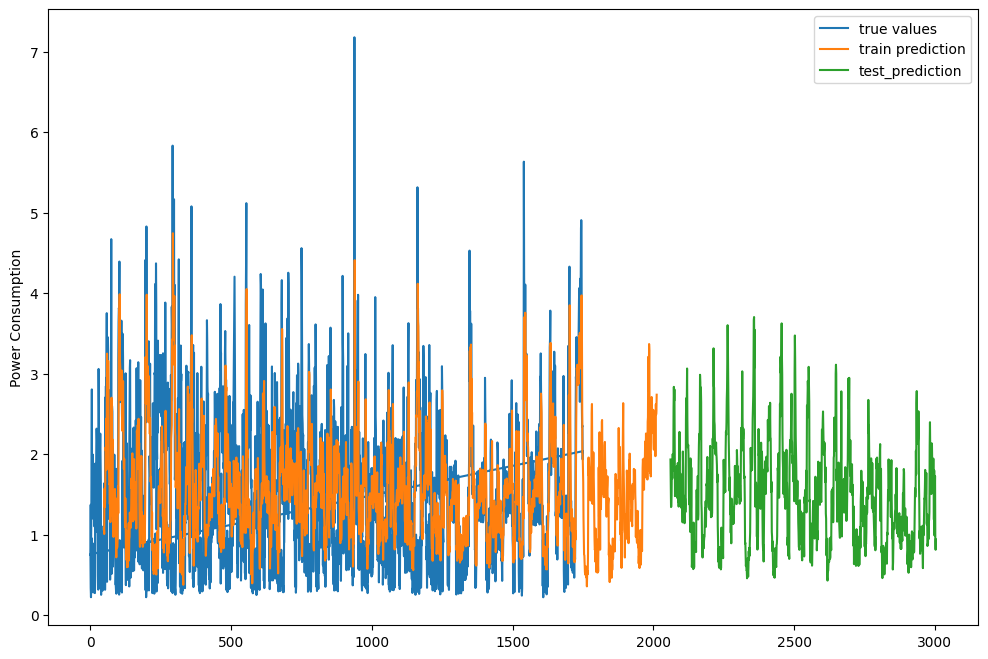

In [12]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(power_data))
plt.plot(power_data, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label='test_prediction')
plt.ylabel('Power Consumption')
plt.legend()

## MLP regressor with hyperparameters

In [13]:
from sklearn.model_selection import  cross_validate, ShuffleSplit
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.metrics import  mean_absolute_percentage_error
np.random.seed(306)
cv = ShuffleSplit(n_splits=48, test_size=0.2, random_state=42)


In [14]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('regressor', MLPRegressor(hidden_layer_sizes=(32)))])

In [15]:
cv_results = cross_validate(pipe,
                            X_train,
                            y_train,
                            cv=cv,
                            scoring="neg_mean_absolute_error",
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs=2)

mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{mlp_train_error.mean():.3f} +/- {mlp_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{mlp_test_error.mean():.3f} +/- {mlp_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.326 +/- 0.018
Mean absolute error of linear regression model on the test set:
0.547 +/- 0.024


In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [17]:
mean_absolute_percentage_error(y_train, pipe.predict(X_train))

0.3124669224574751

In [18]:
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

0.53147172004535

Text(0, 0.5, 'predicted')

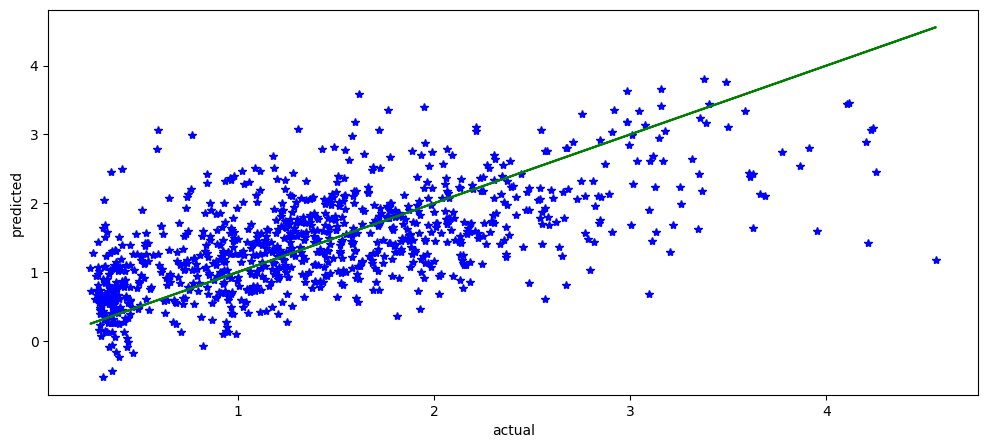

In [19]:
plt.plot(y_test, pipe.predict(X_test), 'b*')
plt.plot(y_test, y_test, 'g-')
plt.xlabel('actual')
plt.ylabel('predicted')

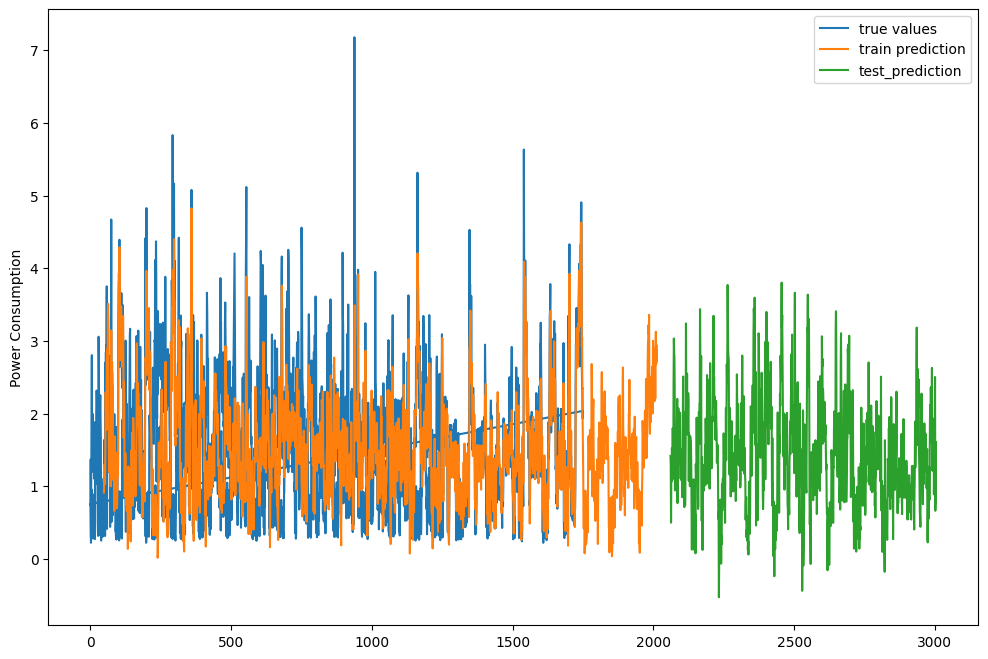

In [20]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = pipe.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = pipe.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(power_data))
plt.plot(power_data, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label='test_prediction')
plt.ylabel('Power Consumption')
plt.legend()

## SVR with hyperparameters

In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
scx = StandardScaler()
scy = StandardScaler()
y_train=y_train.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)
X_train =scx.fit_transform(X_train)
y_train = scx.fit_transform(y_train)
X_test = scx.fit_transform(X_test)
y_test = scx.fit_transform(y_test)

svrgs_parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C':     [10, 100, 1000],
    'gamma':  ('auto', 'scale')
}


svr_cv = GridSearchCV(SVR(), svrgs_parameters, cv=8,
                      scoring='neg_mean_squared_log_error')
svr_cv.fit(X_train, y_train)
print("SVR GridSearch score: "+str(svr_cv.best_score_))
print("SVR GridSearch params: ")
print(svr_cv.best_params_)

SVR GridSearch score: nan
SVR GridSearch params: 
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [22]:
rbf_svr = SVR(kernel='rbf', C=10.0, degree=2)


# Create and train an SVR model using a RBF kernel


rbf_svr.fit(X_train, y_train)

SVR(C=10.0, degree=2)

In [23]:
mean_absolute_percentage_error(y_train, rbf_svr.predict(X_train))

0.5379101495868149

In [24]:
mean_absolute_percentage_error(y_test, rbf_svr.predict(X_test))

4.254562979824217

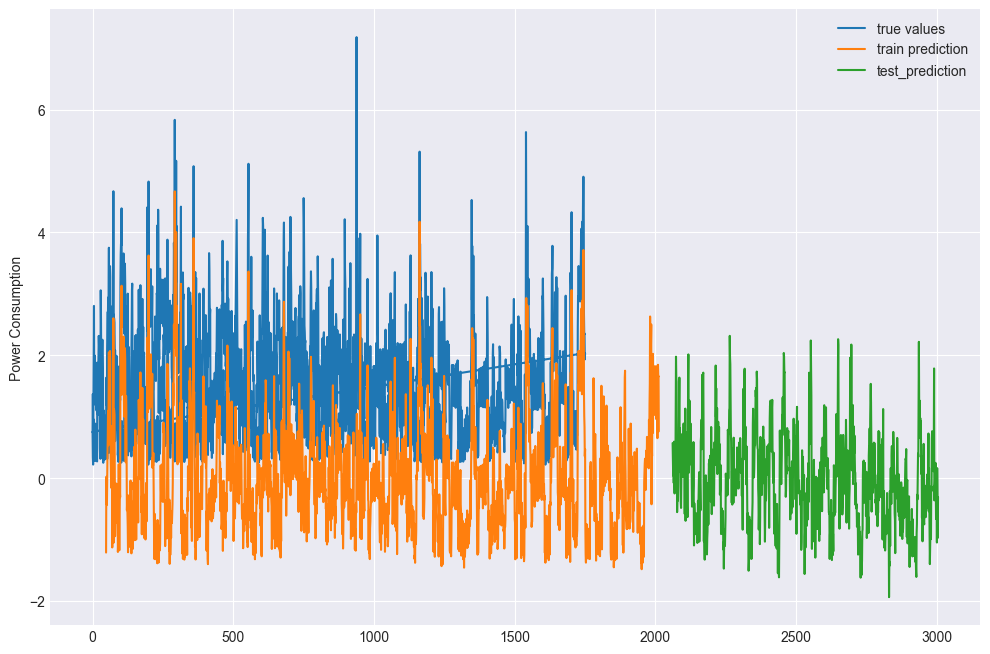

In [25]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = rbf_svr.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = rbf_svr.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(power_data))
plt.plot(power_data, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label='test_prediction')
plt.ylabel('Power Consumption')
plt.legend()